In [97]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import hdbscan
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize

In [98]:
def do_prediction(X_train, Y_train, X_test, Y_test):

    clf = MLPClassifier(hidden_layer_sizes=(5,), 
                    activation='logistic', 
                    alpha=1e-4,
                    solver='sgd', 
                    tol=1e-4,
                    random_state=1,
                    learning_rate_init=.03, 
                    verbose=True)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    return classification_report(Y_test, Y_pred, output_dict=True), Y_pred, clf.predict_proba(X_test)

def plot_multiclass_auc_roc(Y_test, Y_probs):
    classes_list = list(np.unique(Y_test))
    y = label_binarize(Y_test, classes=classes_list)
    num_classes = y.shape[1]
    # print(Y_probs)
    # y_probs = model.predict_proba(np.array(X_test.to_numpy()), cols_d)
    prob_list = np.array([prob_dict for prob_dict in Y_probs])
    
    fpr = dict()
    tpr = dict()
    roc_auc_score = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y[:, i], prob_list[:, i])
        roc_auc_score[i] = auc(fpr[i], tpr[i])

    colors = cycle(['red', 'green', 'blue'])
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, label=f"ROC curve of class {i + 1} , AUC = {roc_auc_score[i]}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [99]:
data = pd.read_csv("../data/digits.csv")
data.drop(['Unnamed: 0'], inplace= True, axis= 1)
data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


In [100]:
np.unique(data['target'], return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

In [101]:
# labels = {'ad.': 1,'nonad.': 0}
  
# data['class'] = [labels[item] for item in data['class']]
# data

In [102]:
x = data.drop(['target'], axis = 1)
y = data['target']
x

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [104]:
hdbscan_model = hdbscan.HDBSCAN()

pred = hdbscan_model.fit_predict(X_train)
# anom_index = np.where(pred == -1)
threshold = pd.Series(hdbscan_model.outlier_scores_).quantile(0.95)
anom_index = np.where(hdbscan_model.outlier_scores_ > threshold)[0]
# print(anom_index)
print(anom_index)
print(len(anom_index))
X_train_new = X_train.drop(X_train.index[anom_index])
Y_train_new = Y_train.drop(Y_train.index[anom_index])
print(X_train_new.shape)

[  38   51   56  206  225  261  284  289  316  319  348  355  363  364
  413  428  462  474  502  504  525  534  554  574  592  612  650  671
  699  701  710  718  790  805  809  817  868  870  876  884  885  950
  956  958  967  988 1008 1055 1082 1093 1140 1157 1176 1177 1184 1186
 1194 1195 1228 1234 1238 1299 1300 1332 1338 1339 1343 1348 1392 1405
 1410 1417]
72
(1365, 64)


In [105]:
# X_train_new = X_new.drop(['target'], axis = 1)
# Y_train_new = X_new['target']

In [106]:
# np.unique(X_new['class'], return_counts=True)

Iteration 1, loss = 2.34699135
Iteration 2, loss = 2.23785270
Iteration 3, loss = 2.15575215
Iteration 4, loss = 2.08922009
Iteration 5, loss = 2.00778155
Iteration 6, loss = 1.92331122
Iteration 7, loss = 1.83922647
Iteration 8, loss = 1.75843916
Iteration 9, loss = 1.67970097
Iteration 10, loss = 1.60403925
Iteration 11, loss = 1.53181691
Iteration 12, loss = 1.46365309
Iteration 13, loss = 1.39665778
Iteration 14, loss = 1.33323810
Iteration 15, loss = 1.27315861
Iteration 16, loss = 1.22091329
Iteration 17, loss = 1.16678588
Iteration 18, loss = 1.11821707
Iteration 19, loss = 1.07418918
Iteration 20, loss = 1.03475661
Iteration 21, loss = 0.99569366
Iteration 22, loss = 0.96144640
Iteration 23, loss = 0.92708030
Iteration 24, loss = 0.89665823
Iteration 25, loss = 0.87188637
Iteration 26, loss = 0.84585619
Iteration 27, loss = 0.81697383
Iteration 28, loss = 0.79129072
Iteration 29, loss = 0.77313113
Iteration 30, loss = 0.75105980
Iteration 31, loss = 0.73081605
Iteration 32, los

c:\Users\DELL\miniconda3\envs\rish_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<AxesSubplot:>

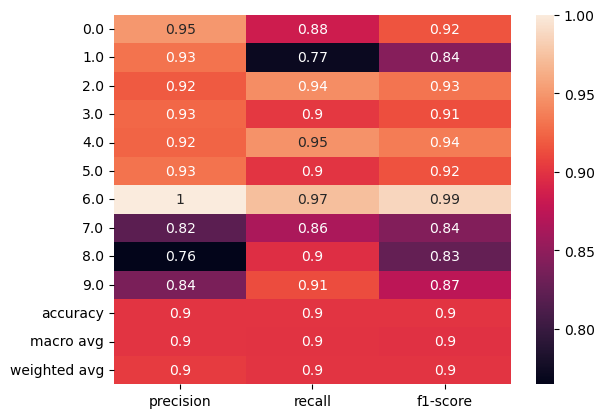

In [107]:
class_report_new, Y_pred_new, Y_probs_new = do_prediction(X_train_new, Y_train_new, X_test, Y_test)
print(class_report_new)
sns.heatmap(pd.DataFrame(class_report_new).iloc[:-1, :].T, annot=True)

Iteration 1, loss = 2.35394094
Iteration 2, loss = 2.22873221
Iteration 3, loss = 2.14173916
Iteration 4, loss = 2.06343938
Iteration 5, loss = 1.97984047
Iteration 6, loss = 1.88956681
Iteration 7, loss = 1.80241276
Iteration 8, loss = 1.71803605
Iteration 9, loss = 1.63667256
Iteration 10, loss = 1.55825642
Iteration 11, loss = 1.48650718
Iteration 12, loss = 1.41272760
Iteration 13, loss = 1.34630016
Iteration 14, loss = 1.28364787
Iteration 15, loss = 1.22261510
Iteration 16, loss = 1.16796483
Iteration 17, loss = 1.11325222
Iteration 18, loss = 1.06359202
Iteration 19, loss = 1.01694701
Iteration 20, loss = 0.97919718
Iteration 21, loss = 0.94415936
Iteration 22, loss = 0.89910894
Iteration 23, loss = 0.86754921
Iteration 24, loss = 0.83515688
Iteration 25, loss = 0.81269557
Iteration 26, loss = 0.78506106
Iteration 27, loss = 0.75796719
Iteration 28, loss = 0.74480566
Iteration 29, loss = 0.71461143
Iteration 30, loss = 0.70176307
Iteration 31, loss = 0.67849848
Iteration 32, los

c:\Users\DELL\miniconda3\envs\rish_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<AxesSubplot:>

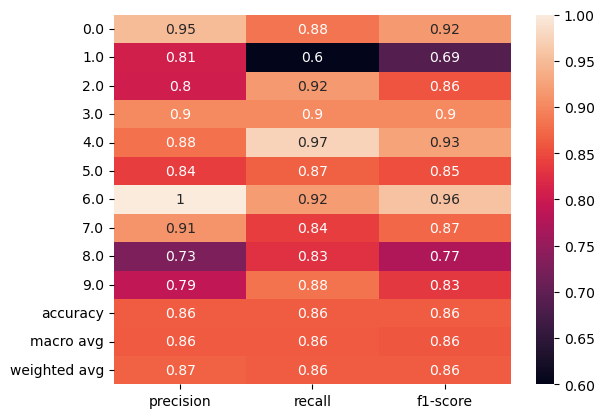

In [108]:
class_report, Y_pred, Y_probs = do_prediction(X_train, Y_train, X_test, Y_test)
print(class_report)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True)

In [109]:
print(X_train.shape, X_train_new.shape)

(1437, 64) (1365, 64)


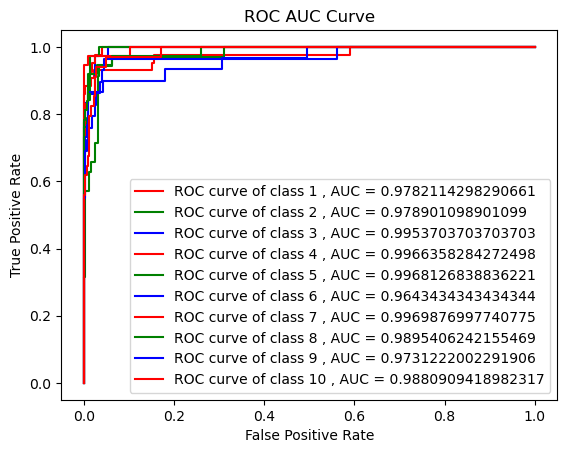

In [110]:
plot_multiclass_auc_roc(Y_test, Y_probs)

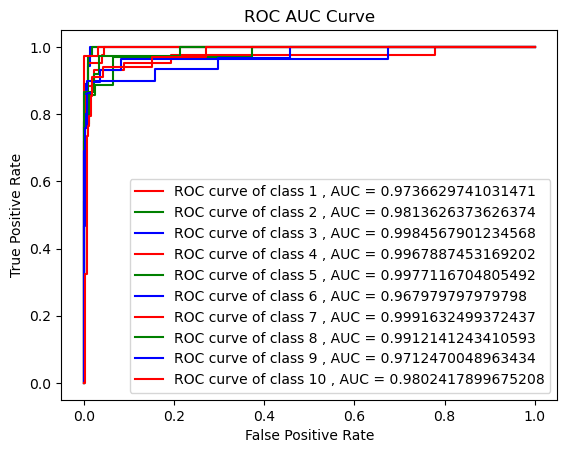

In [111]:
plot_multiclass_auc_roc(Y_test, Y_probs_new)